In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
import os
#importing the data
data = pd.read_excel('Iris_dataset.xls', index_col=0)

#renaming the columns
data.head()

,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
Species_No,,,,,
1,0.2,1.4,3.5,5.1,Setosa
1,0.2,1.4,3.0,4.9,Setosa
1,0.2,1.3,3.2,4.7,Setosa
1,0.2,1.5,3.1,4.6,Setosa
1,0.2,1.4,3.6,5.0,Setosa


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 3
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal_width   150 non-null    float64
 1   Petal_length  150 non-null    float64
 2   Sepal_width   150 non-null    float64
 3   Sepal_length  150 non-null    float64
 4   Species_name  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
data.describe()

,Petal_width,Petal_length,Sepal_width,Sepal_length
count,150.000000,150.000000,150.000000,150.000000
mean,1.199333,3.758000,3.057333,5.843333
std,0.762238,1.765298,0.435866,0.828066
min,0.100000,1.000000,2.000000,4.300000
25%,0.300000,1.600000,2.800000,5.100000
50%,1.300000,4.350000,3.000000,5.800000
75%,1.800000,5.100000,3.300000,6.400000
max,2.500000,6.900000,4.400000,7.900000


In [17]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))


Rows : 150, column : 5


In [18]:
data['Species_name'].value_counts()

 Setosa        50
 Versicolor    50
 Verginica     50
Name: Species_name, dtype: int64

<AxesSubplot:>

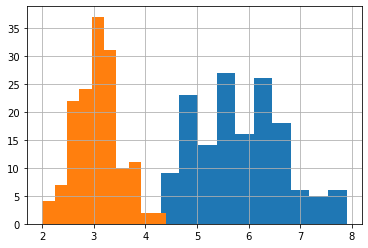

In [19]:
data['Sepal_length'].hist()
data['Sepal_width'].hist()

<AxesSubplot:>

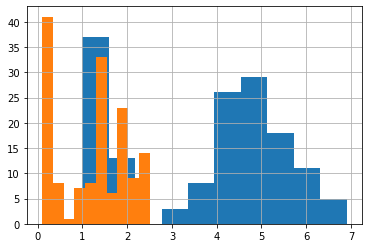

In [20]:
data['Petal_length'].hist()
data['Petal_width'].hist()

In [21]:
data.corr()

,Petal_width,Petal_length,Sepal_width,Sepal_length
Petal_width,1.000000,0.962865,-0.366126,0.817941
Petal_length,0.962865,1.000000,-0.428440,0.871754
Sepal_width,-0.366126,-0.428440,1.000000,-0.117570
Sepal_length,0.817941,0.871754,-0.117570,1.000000


In [22]:
#Label Encoder - converting labels into numeric form into machine readable form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species_name'] = le.fit_transform(data['Species_name'])
data.head(100)

,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
Species_No,,,,,
1,0.2,1.4,3.5,5.1,0
1,0.2,1.4,3.0,4.9,0
1,0.2,1.3,3.2,4.7,0
1,0.2,1.5,3.1,4.6,0
1,0.2,1.4,3.6,5.0,0
...,...,...,...,...,...
2,1.2,4.2,3.0,5.7,2
2,1.3,4.2,2.9,5.7,2
2,1.3,4.3,2.9,6.2,2


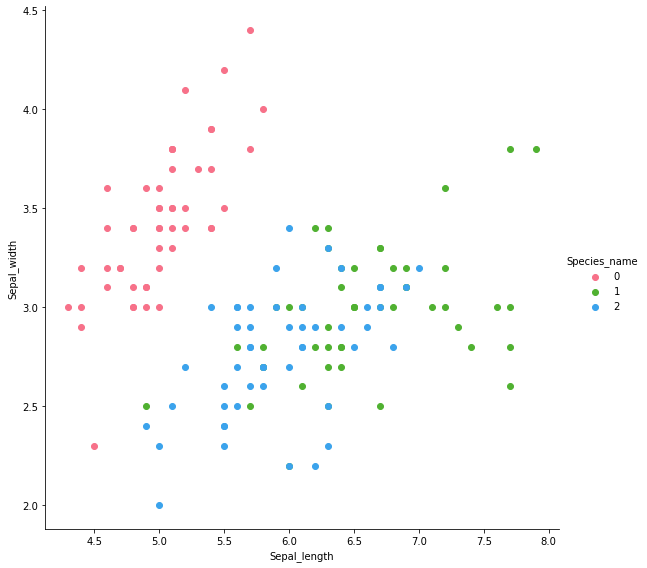

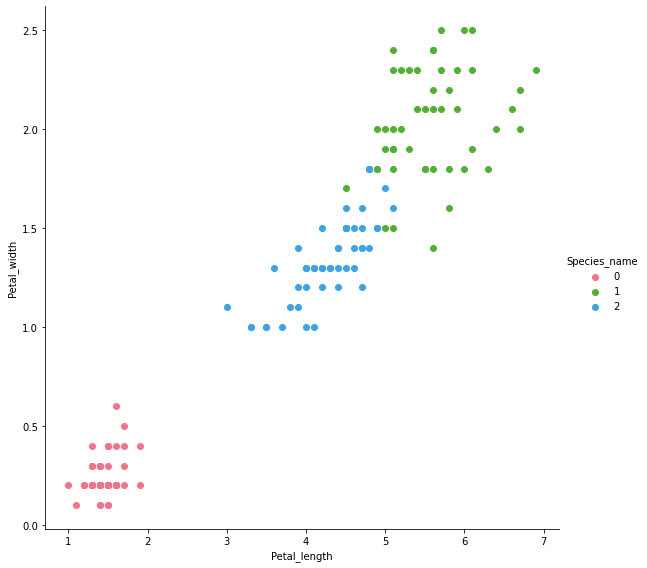

In [23]:
sns.FacetGrid(data, hue="Species_name", palette="husl", height=8) \
.map(plt.scatter, "Sepal_length", "Sepal_width") \
.add_legend() 
plt.show()


sns.FacetGrid(data, hue="Species_name", palette="husl", height=8) \
.map(plt.scatter, "Petal_length", "Petal_width") \
.add_legend() 
plt.show()

In [24]:
data.isnull().sum()

Petal_width     0
Petal_length    0
Sepal_width     0
Sepal_length    0
Species_name    0
dtype: int64

In [25]:
data.groupby('Species_name').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('Species_name').agg([np.mean, np.median])

Petal_width        Petal_length        Sepal_width         \
                    mean median         mean median        mean median   
Species_name                                                             
0                  0.246    0.2        1.462   1.50       3.428    3.4   
1                  2.026    2.0        5.552   5.55       2.974    3.0   
2                  1.326    1.3        4.260   4.35       2.770    2.8   

             Sepal_length         
                     mean median  
Species_name                      
0                   5.006    5.0  
1                   6.588    6.5  
2                   5.936    5.9

<AxesSubplot:xlabel='Species_name', ylabel='Sepal_width'>

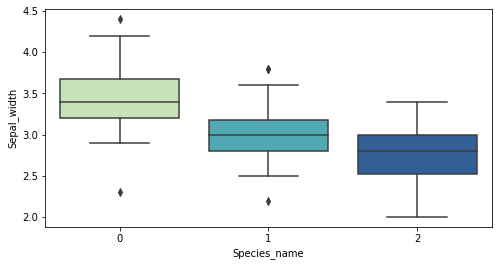

In [26]:
plt.figure(figsize=(8,4)) 
sns.boxplot(x='Species_name',y='Sepal_width',data=data ,palette='YlGnBu')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'petal width distribution plot')

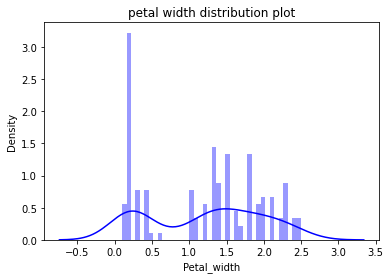

In [27]:
sns.distplot(a=data['Petal_width'], bins=40, color='b')
plt.title('petal width distribution plot')

<AxesSubplot:xlabel='Species_name', ylabel='count'>

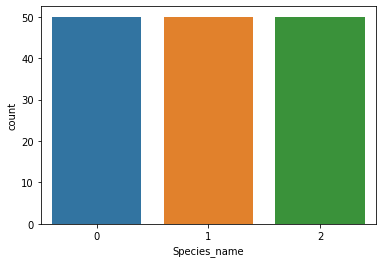

In [28]:
sns.countplot(x='Species_name',data=data)

<AxesSubplot:>

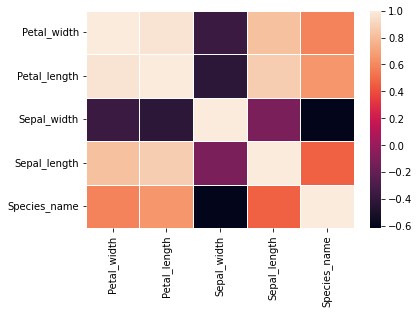

In [29]:
sns.heatmap(data.corr(), linecolor='white', linewidths=1)

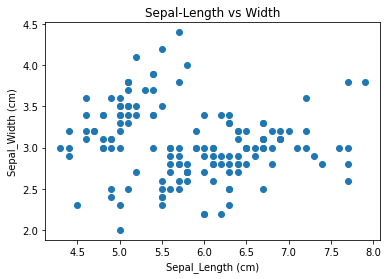

In [30]:
axis = plt.axes()

axis.scatter(data.Sepal_length, data.Sepal_width)

axis.set(xlabel='Sepal_Length (cm)',
   ylabel='Sepal_Width (cm)',
   title='Sepal-Length vs Width');

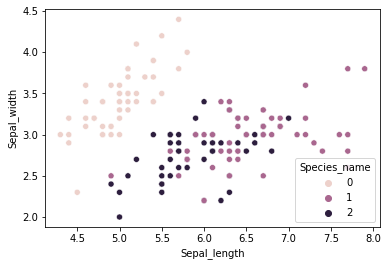

In [31]:
sns.scatterplot(x='Sepal_length', y='Sepal_width', hue='Species_name', data=data)
plt.show()

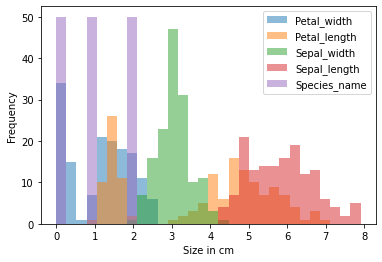

In [32]:
axis = data.plot.hist(bins=30, alpha=0.5)
axis.set_xlabel('Size in cm');

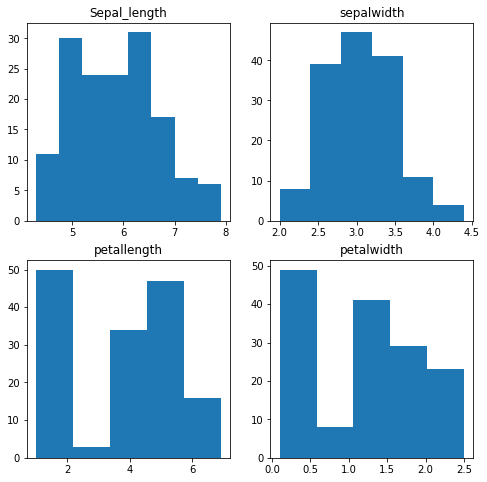

In [33]:
figure, ax = plt.subplots(2, 2, figsize=(8,8))

ax[0,0].set_title("Sepal_length")
ax[0,0].hist(data['Sepal_length'], bins=8)

ax[0,1].set_title("sepalwidth")
ax[0,1].hist(data['Sepal_width'], bins=6);

ax[1,0].set_title("petallength")
ax[1,0].hist(data['Petal_length'], bins=5);

ax[1,1].set_title("petalwidth")
ax[1,1].hist(data['Petal_width'], bins=5);

<AxesSubplot:xlabel='Petal_width', ylabel='Species_name'>

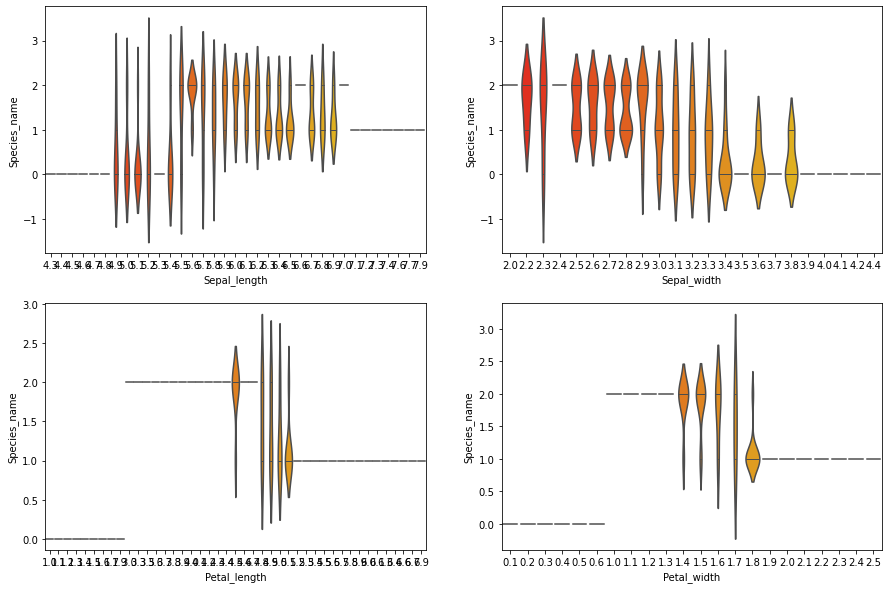

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Sepal_length', y='Species_name', data=data, inner='stick', palette='autumn')
plt.subplot(2,2,2)
sns.violinplot(x='Sepal_width', y='Species_name', data=data, inner='stick', palette='autumn')
plt.subplot(2,2,3)
sns.violinplot(x='Petal_length', y='Species_name', data=data, inner='stick', palette='autumn')
plt.subplot(2,2,4)
sns.violinplot(x='Petal_width', y='Species_name', data=data, inner='stick', palette='autumn')

In [35]:
data.columns

Index(['Petal_width', 'Petal_length', 'Sepal_width', 'Sepal_length',
       'Species_name'],
      dtype='object')

In [36]:
data['species_detailed'] = data['Species_name']

#replacing the two not setosa species with "not Setosa"
dic_setosa = {'Versicolor': 'not Setosa', 'Verginica': 'not Setosa', 'Setosa': 'Setosa'}
data = data.replace({"Species_name": dic_setosa})
data['Species_name'].value_counts()


0    50
2    50
1    50
Name: Species_name, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = data.drop(columns = ['Species_name'])
Y = data['Species_name']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [39]:
print(X_test)

            Petal_width  Petal_length  Sepal_width  Sepal_length  \
Species_No                                                         
3                   2.3           5.3          3.2           6.4   
1                   0.1           1.4          3.6           4.9   
3                   2.0           6.7          2.8           7.7   
2                   1.3           4.0          2.8           6.1   
3                   2.3           5.7          3.2           6.9   
2                   1.6           4.7          3.3           6.3   
1                   0.2           1.5          3.4           5.0   
1                   0.2           1.5          3.1           4.6   
2                   1.2           4.0          2.6           5.8   
3                   1.5           5.0          2.2           6.0   
1                   0.2           1.5          3.1           4.9   
2                   1.3           4.4          2.3           6.3   
1                   0.4           1.7          3

In [40]:
print(Y_test)

Species_No
3    1
1    0
3    1
2    2
3    1
2    2
1    0
1    0
2    2
3    1
1    0
2    2
1    0
2    2
3    1
2    2
1    0
1    0
1    0
3    1
1    0
2    2
2    2
2    2
2    2
1    0
1    0
2    2
2    2
2    2
2    2
3    1
1    0
2    2
2    2
2    2
2    2
2    2
Name: Species_name, dtype: int32


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(X_train, Y_train)

LogisticRegression()

In [43]:
print("Accuracy: ", model.score(X_test, Y_test) * 100)

Accuracy:  100.0
